In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv("D:\Data Analyst\Programming\Python\Test Datasets\covid_19_data.csv")

In [3]:
display(df)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
172475,172476,12/06/2020,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.0,337.0,6556.0
172476,172477,12/06/2020,Zeeland,Netherlands,2020-12-07 05:26:14,6710.0,104.0,0.0
172477,172478,12/06/2020,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.0,1.0,1288.0
172478,172479,12/06/2020,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.0,531.0,22263.0


In [4]:
df.drop(['SNo',"Last Update"],axis=1,inplace=True) #deleting columns Axis =1 is column,Axis =1 is row, inplace is to change dataframe itself or else data get stored into temp variable 

In [5]:
df.rename(columns={'ObservationDate':'Date','Province/State':'Province','Country/Region':'Country'},inplace=True)

In [7]:
df["Date"]=pd.to_datetime(df["Date"]) #chnaging Date format

In [8]:
imputer=SimpleImputer(strategy='constant')
df2=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [9]:
df2=df.groupby(["Country","Date"])[["Country","Date","Confirmed","Deaths","Recovered"]].sum().reset_index()

In [10]:
df2.head(20)

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,"('St. Martin',)",2020-03-10,2.0,0.0,0.0
2,Afghanistan,2020-02-24,1.0,0.0,0.0
3,Afghanistan,2020-02-25,1.0,0.0,0.0
4,Afghanistan,2020-02-26,1.0,0.0,0.0
5,Afghanistan,2020-02-27,1.0,0.0,0.0
6,Afghanistan,2020-02-28,1.0,0.0,0.0
7,Afghanistan,2020-02-29,1.0,0.0,0.0
8,Afghanistan,2020-03-01,1.0,0.0,0.0
9,Afghanistan,2020-03-02,1.0,0.0,0.0


In [11]:
countries=df2['Country'].unique()
len(countries)

226

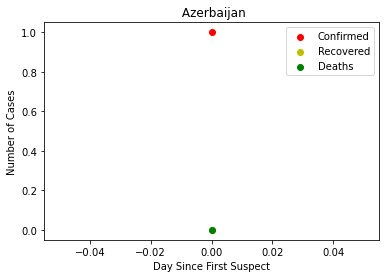

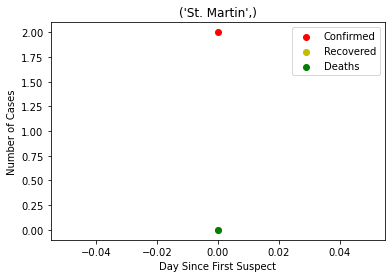

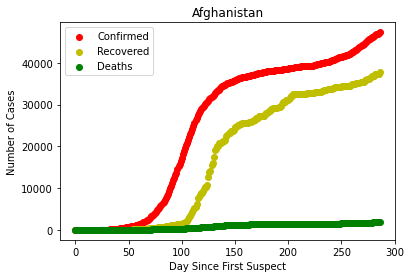

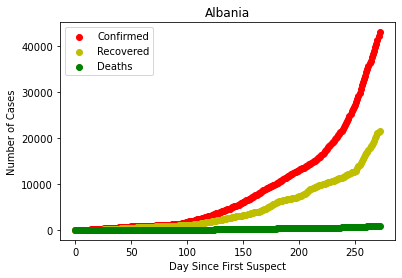

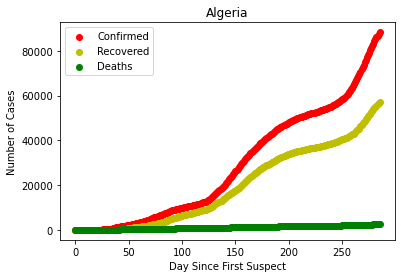

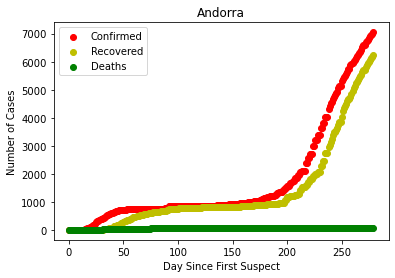

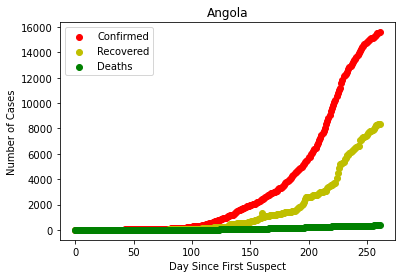

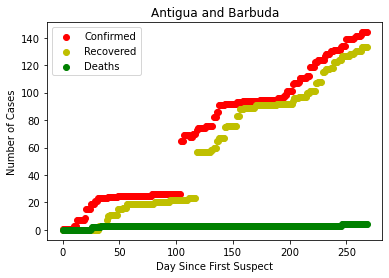

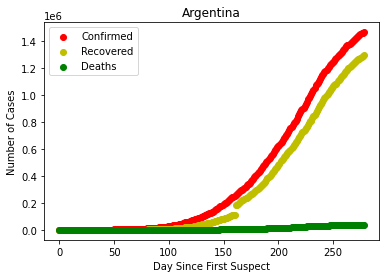

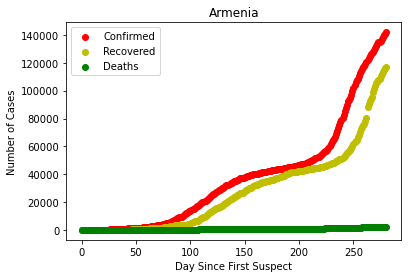

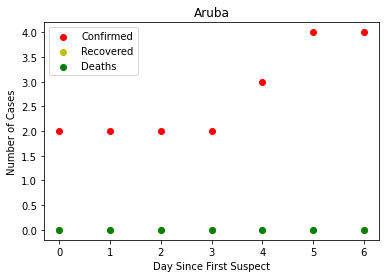

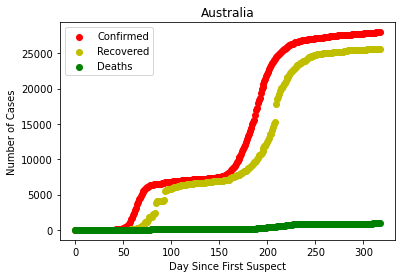

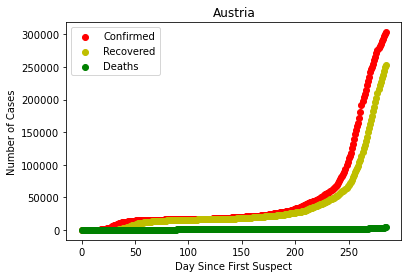

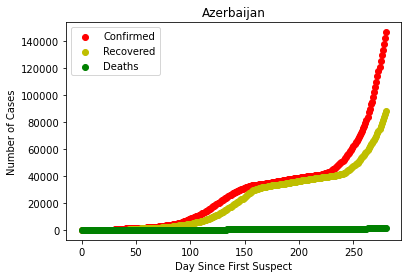

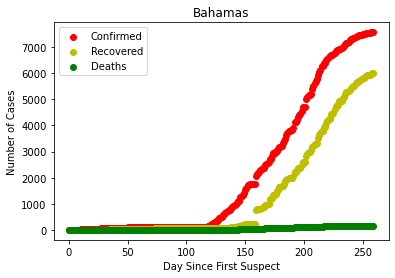

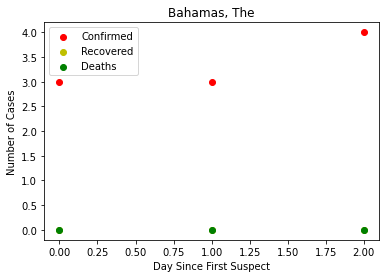

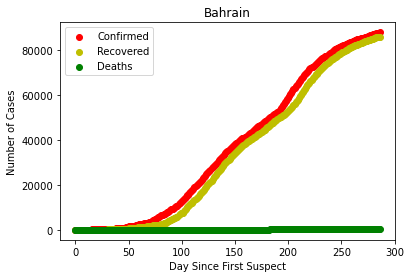

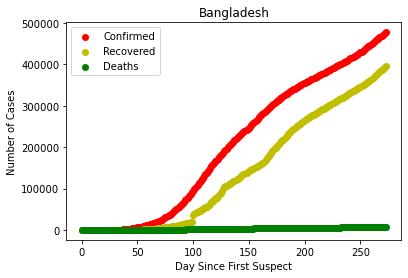

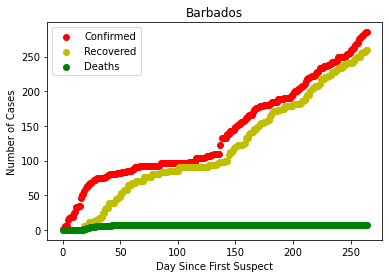

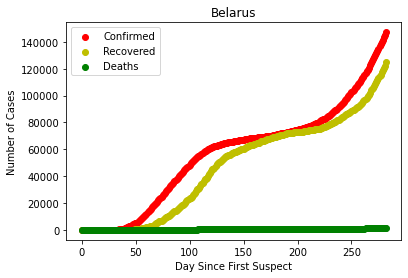

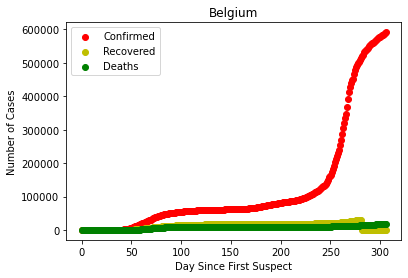

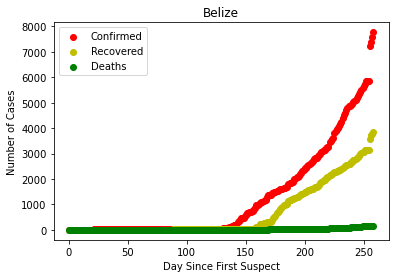

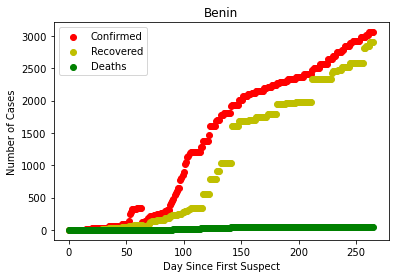

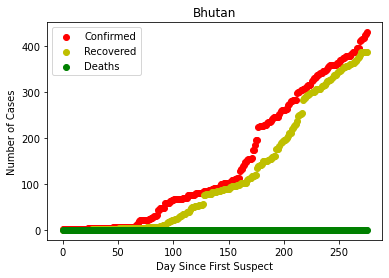

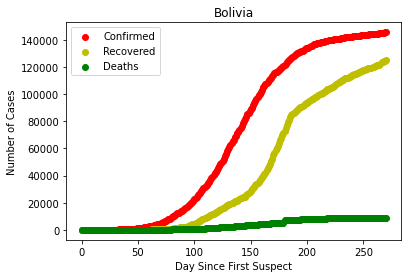

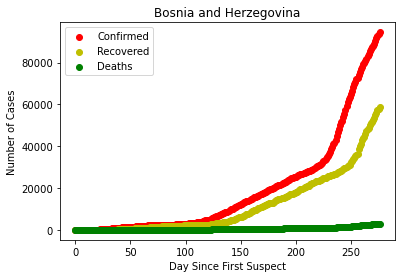

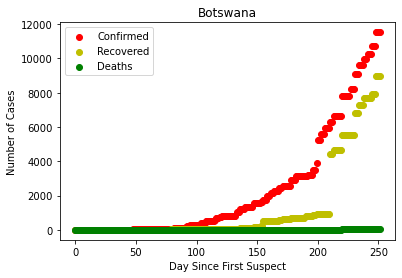

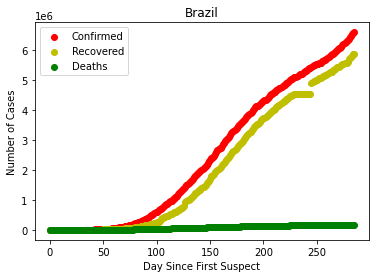

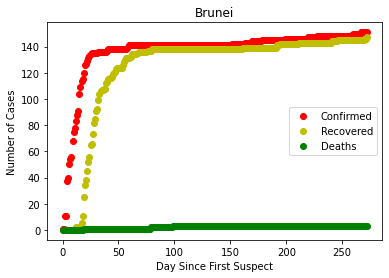

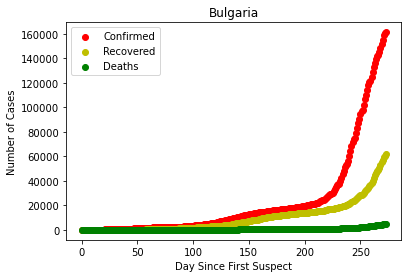

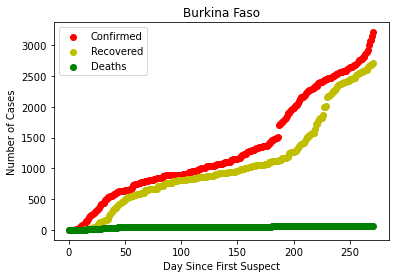

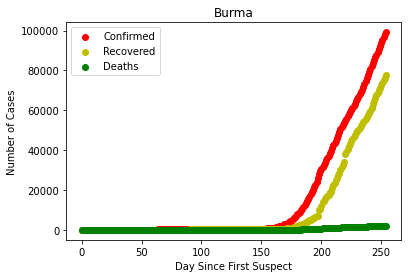

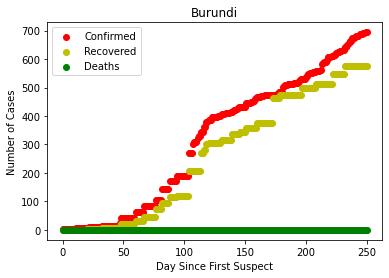

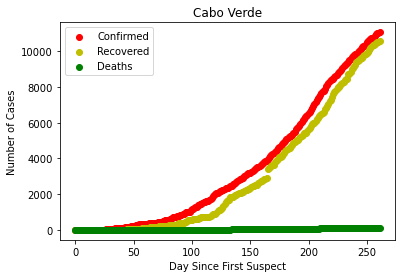

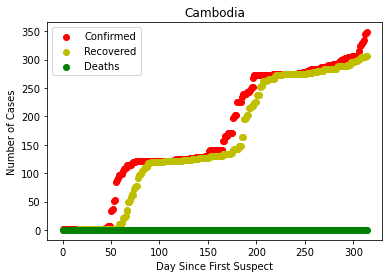

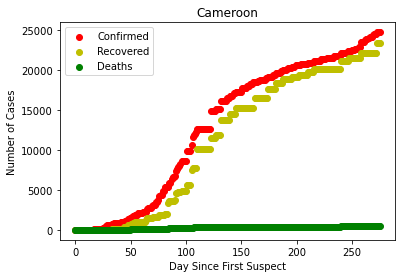

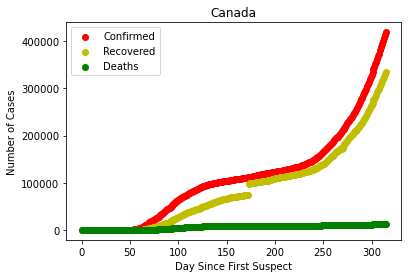

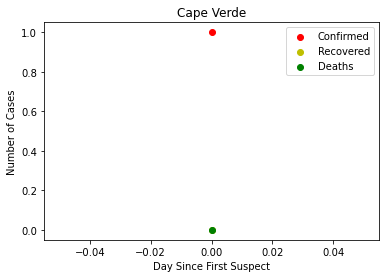

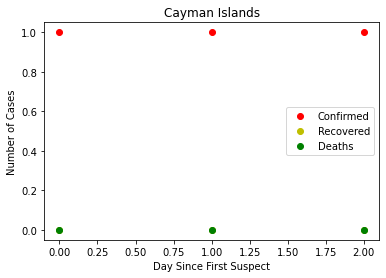

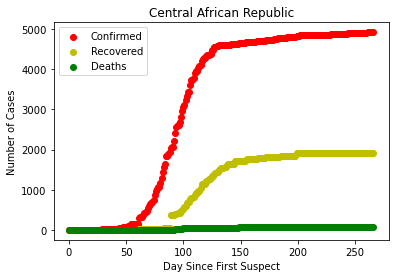

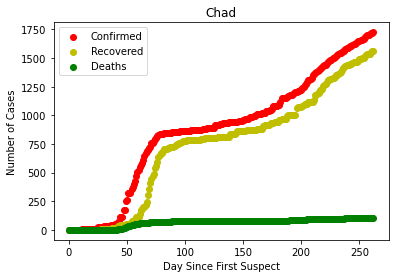

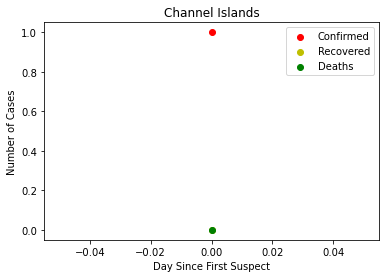

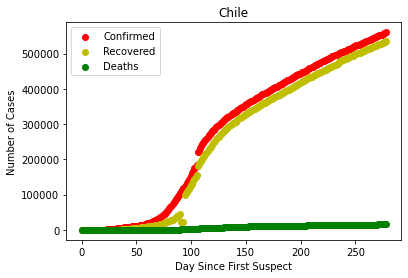

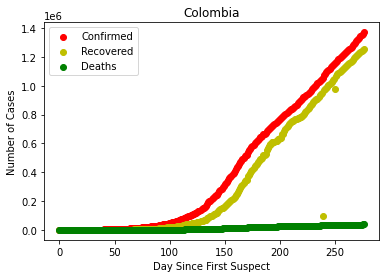

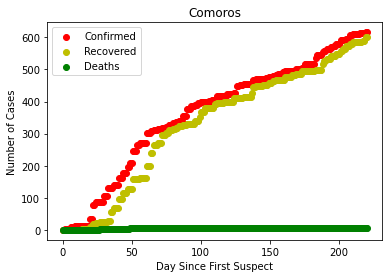

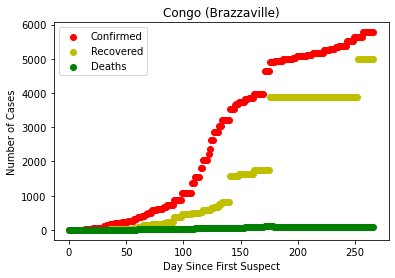

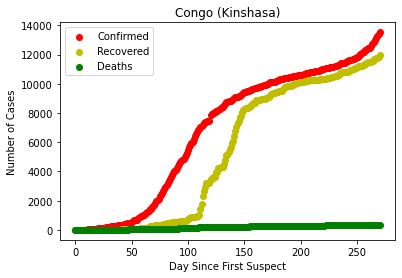

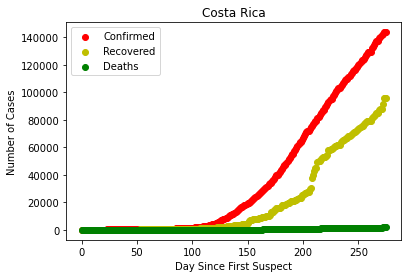

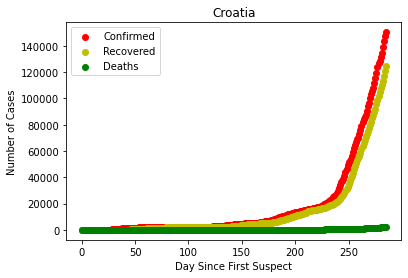

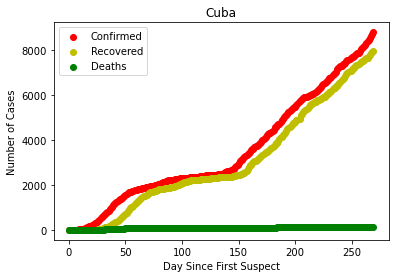

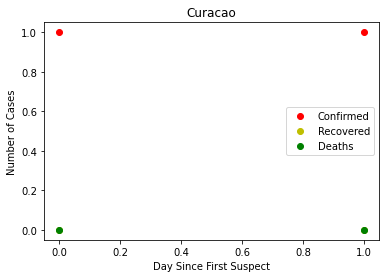

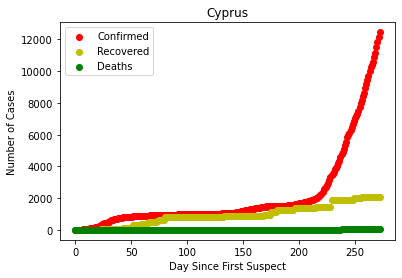

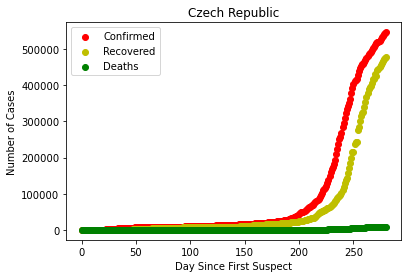

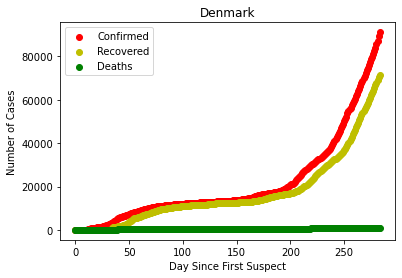

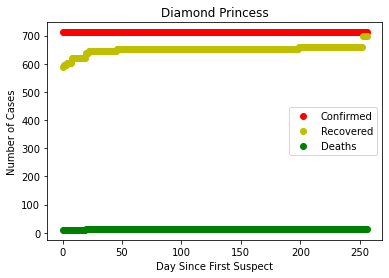

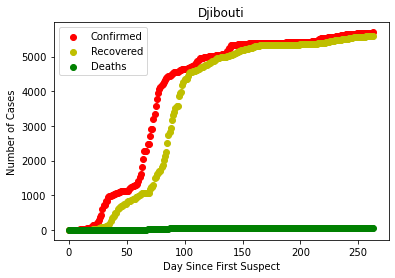

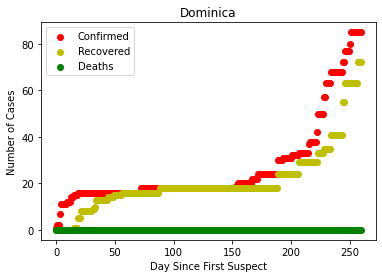

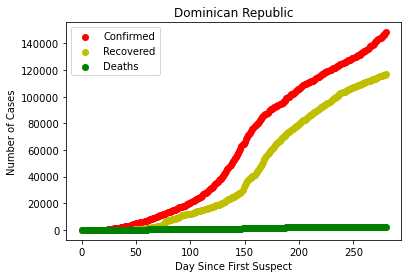

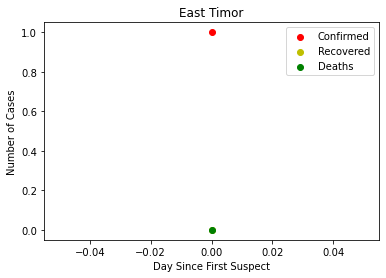

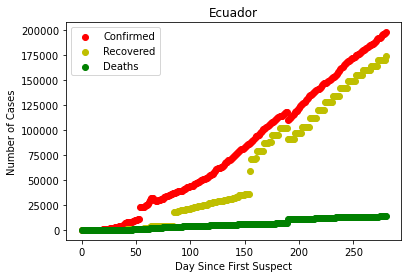

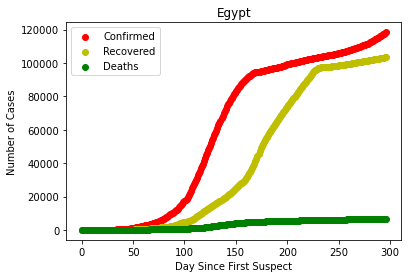

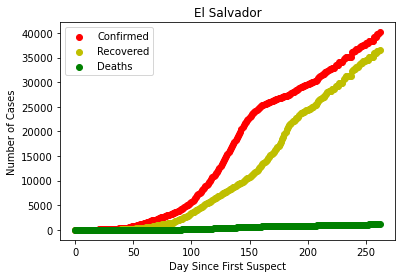

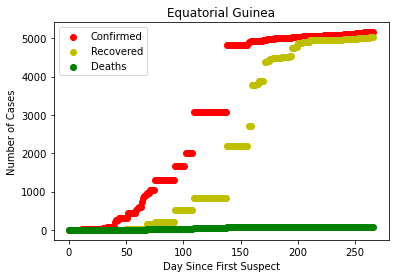

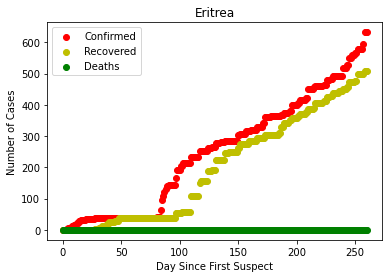

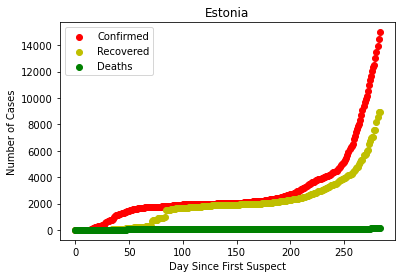

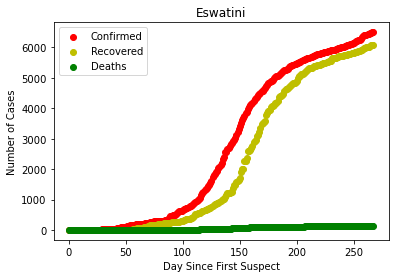

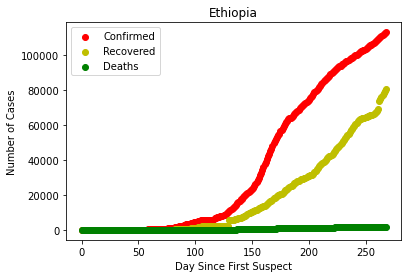

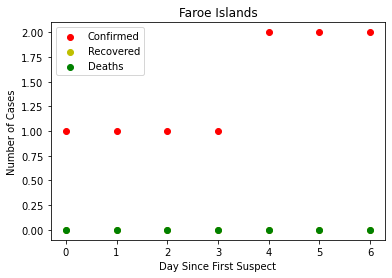

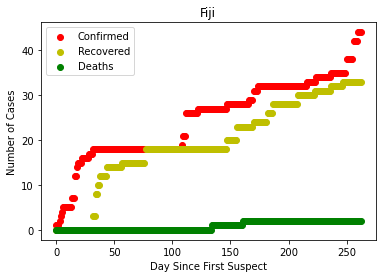

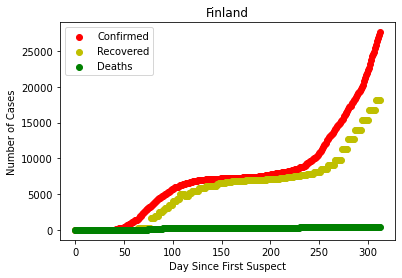

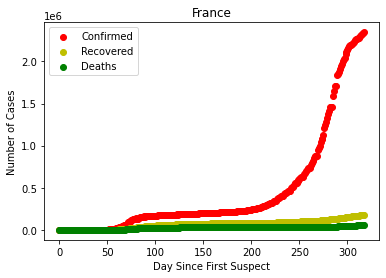

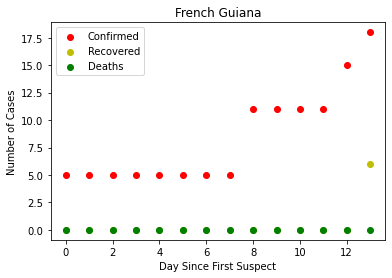

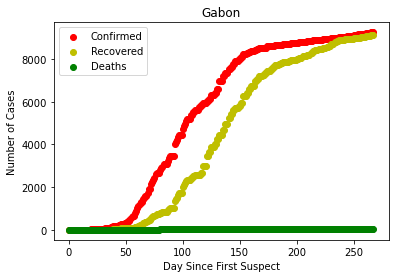

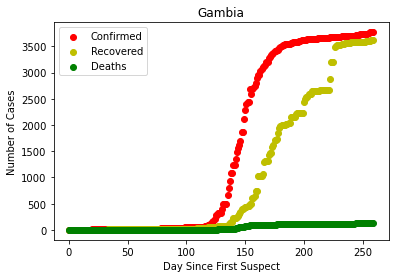

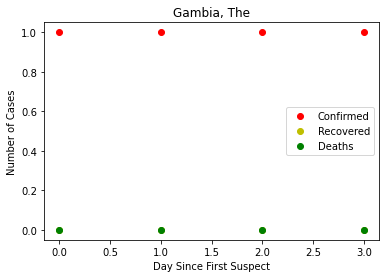

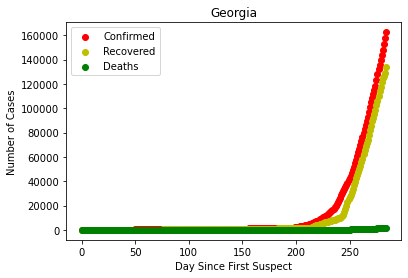

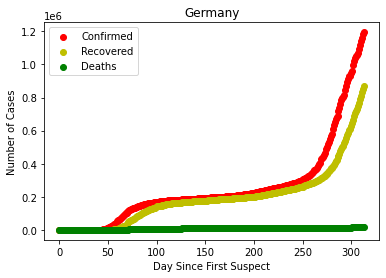

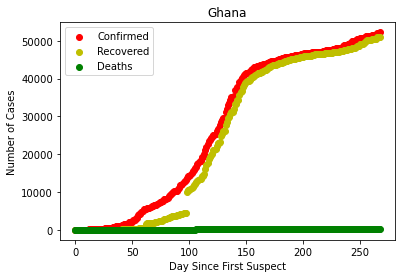

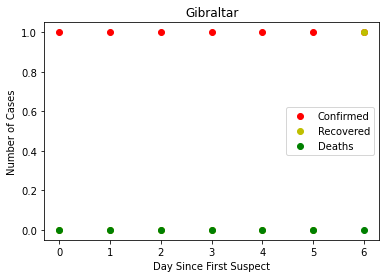

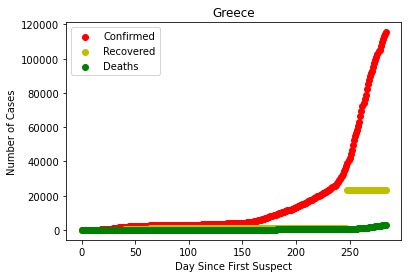

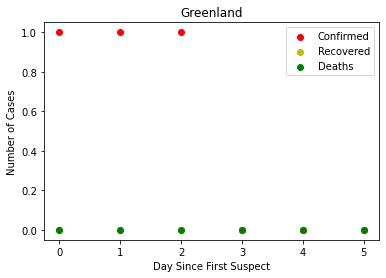

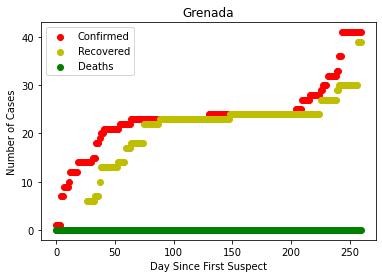

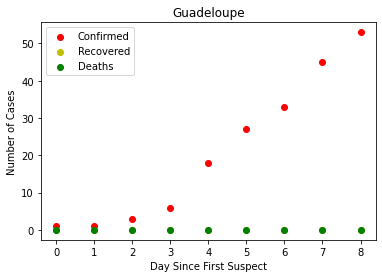

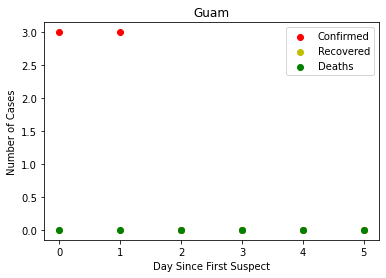

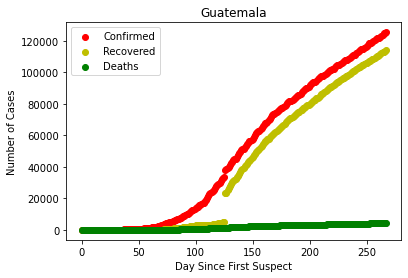

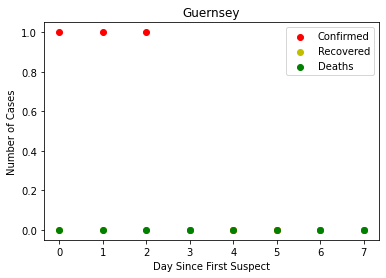

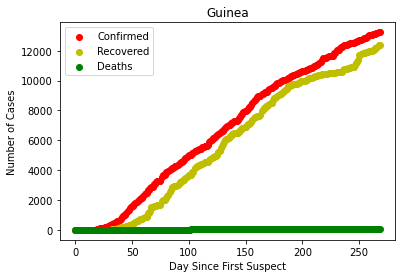

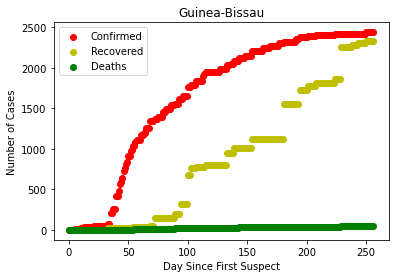

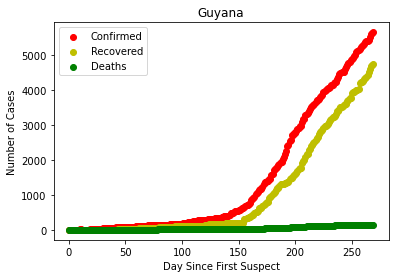

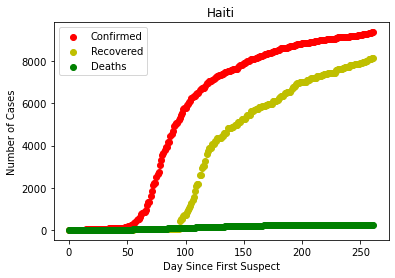

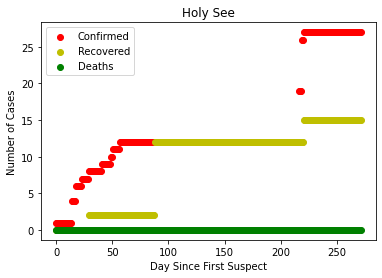

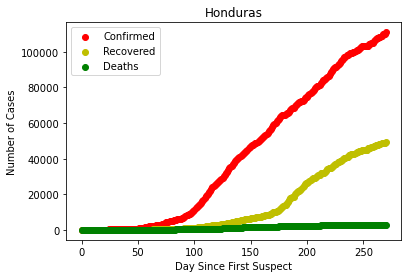

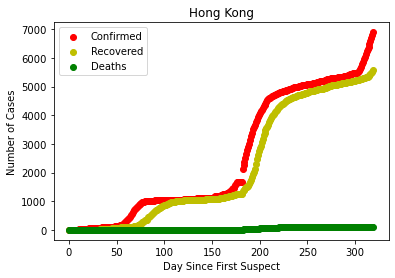

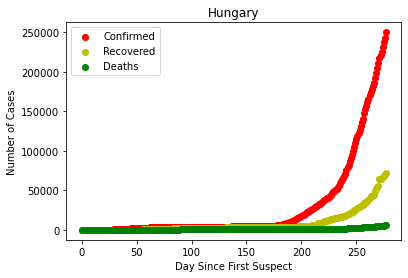

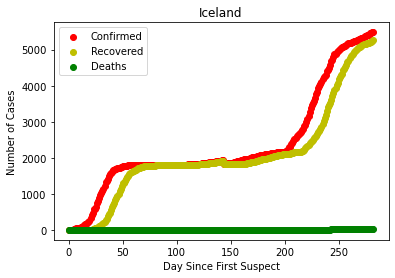

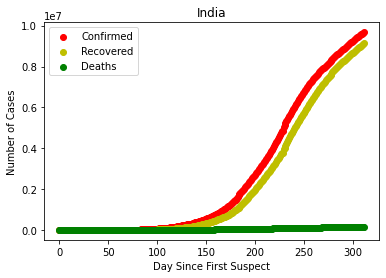

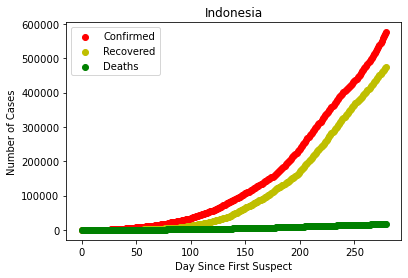

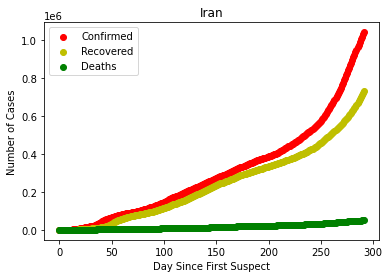

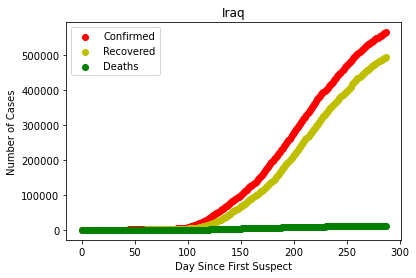

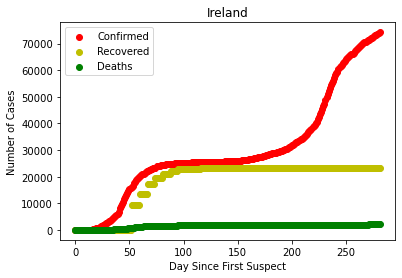

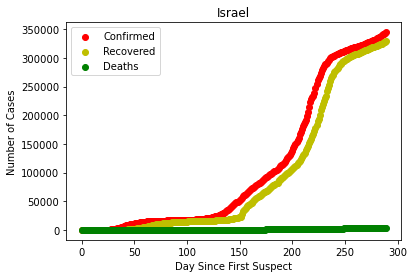

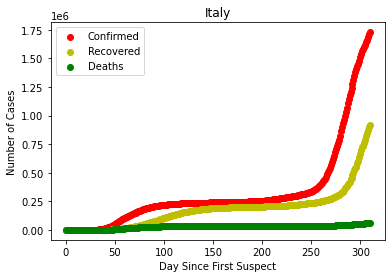

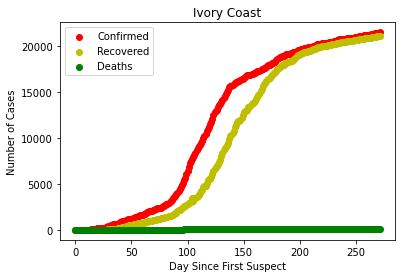

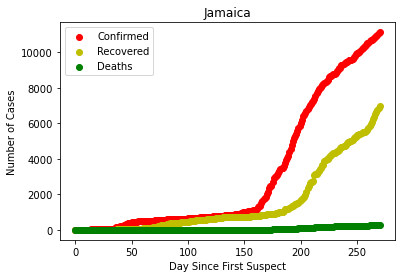

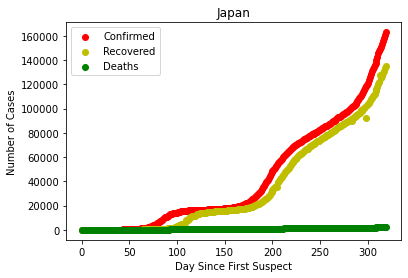

KeyboardInterrupt: 

In [16]:
for x in range (0,len(countries)):
    c=df2[df2['Country'] == countries[x]].reset_index()
    plt.scatter(np.arange(0,len(c)), c["Confirmed"],color='r',label="Confirmed")
    plt.scatter(np.arange(0,len(c)), c["Recovered"],color='y',label="Recovered")
    plt.scatter(np.arange(0,len(c)), c["Deaths"],color='g',label="Deaths")
    plt.title(countries[x])
    plt.xlabel('Day Since First Suspect')
    plt.ylabel("Number of Cases")
    plt.legend()
    plt.show()

In [12]:
df3=df2.groupby(["Date"])[["Date","Confirmed","Deaths","Recovered"]].sum().reset_index()

In [13]:
df3

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1438.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0
...,...,...,...,...
315,2020-12-02,64530517.0,1493742.0,41496318.0
316,2020-12-03,65221040.0,1506260.0,41932091.0
317,2020-12-04,65899441.0,1518670.0,42352021.0
318,2020-12-05,66540034.0,1528868.0,42789879.0


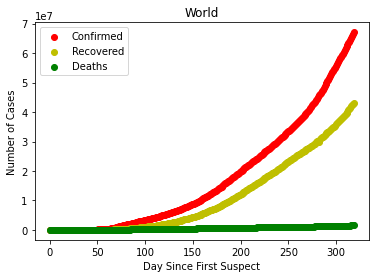

In [14]:
f=df3
plt.scatter(np.arange(0,len(f)),f["Confirmed"],color='r',label="Confirmed")
plt.scatter(np.arange(0,len(f)),f["Recovered"],color='y',label="Recovered")
plt.scatter(np.arange(0,len(f)),f["Deaths"],color='g',label="Deaths")
plt.title("World")
plt.xlabel('Day Since First Suspect')
plt.ylabel("Number of Cases")
plt.legend()
plt.show()
